In [1]:
#Headlines dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('headlines.csv', header=None)

In [31]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [32]:
df.iloc[1,:].values[0]

'Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s Own Scot

In [33]:
df.shape

(2225, 1)

In [34]:
df.columns=['headlines']

In [35]:
df.head()

,headlines
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...


In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [37]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer() 

In [48]:
def lemmatize(word):
    tag = pos_tag([word])
    pos='n'
    if tag[0][1].startswith('N'):
        pos='n'
    if tag[0][1].startswith('V'):
        pos='v'
    if tag[0][1].startswith('R'):
        pos='r'
    if tag[0][1].startswith('J'):
        pos='a'
    return wnl.lemmatize(word, pos=pos)

In [59]:
lemmatize('programming')

'program'

In [60]:
def dataprep(sent):
    swords = stopwords.words('english')
    lst_clean =[x for x in word_tokenize(sent) if x.lower() not in swords and x.isalnum()]
    tokens3 = [word.lower() for word in lst_clean]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [61]:
sent = 'Hello friends! How are you? He likes python programming.'

In [62]:
dataprep(sent)

['hello', 'friend', 'like', 'python', 'program']

In [63]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
# create the object
tf = TfidfVectorizer(analyzer=dataprep)

In [70]:
%%time
x_new = tf.fit_transform(df['headlines'])
x_new

CPU times: total: 3min 27s
Wall time: 3min 33s


<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

In [71]:
### Creating clusters

In [72]:
from sklearn.cluster import KMeans

In [73]:
km = KMeans(random_state=0)

In [74]:
km.fit_predict(x_new)

array([4, 6, 4, ..., 2, 5, 2])

In [75]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [76]:
km.inertia_

2067.4969194117366

### Elbow method

In [83]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)
sse

[2158.1638456648802,
 2136.7371877395954,
 2120.65464857829,
 2110.2507559604214,
 2093.2102487906163,
 2084.606644836629,
 2079.549640885244,
 2067.4969194117366,
 2062.427172132046,
 2055.0892624682315,
 2046.512805310553,
 2040.8698732414305,
 2034.6764514343836,
 2030.0046084142637,
 2025.6996559473744]

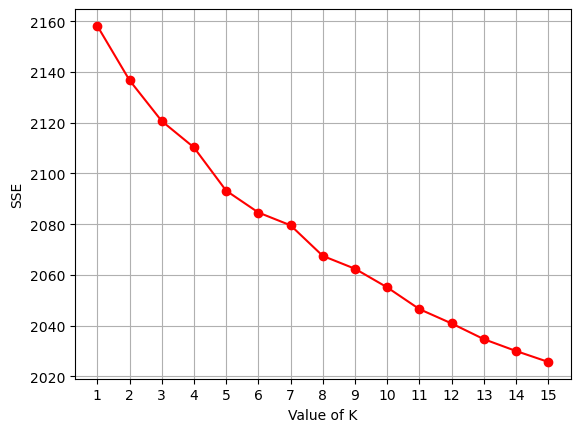

In [85]:
## Plotting the elbow method to check for the ideal number of clusters
## It was observed that there is no precise elbow 
## Thus we went with '5' clusters
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o', color='r')

In [86]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [87]:
labels=km.fit_predict(x_new)

In [88]:
labels

array([4, 3, 4, ..., 3, 3, 3])

#### Separate the clusters

In [97]:
((pd.Series(labels)).value_counts()).sort_index()

0    376
1    331
2    521
3    716
4    281
Name: count, dtype: int64

In [98]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [99]:
from wordcloud import WordCloud

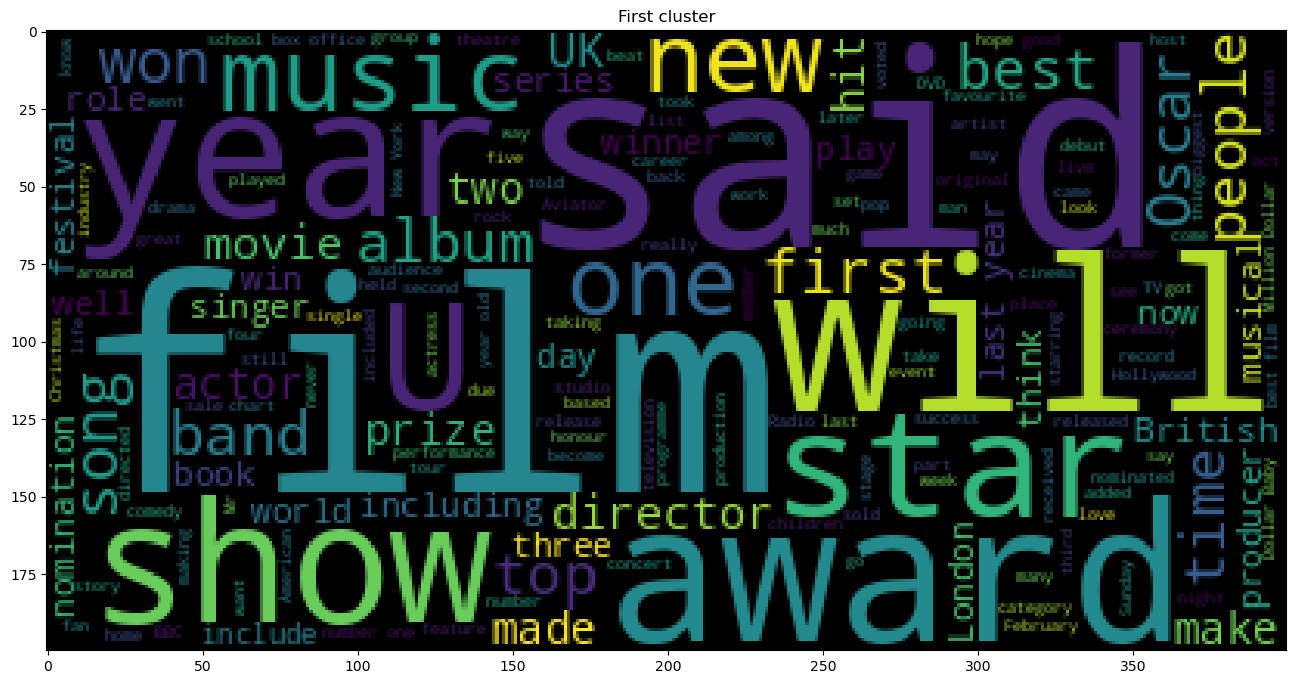

In [101]:
wc = WordCloud().generate(' '.join(one['headlines']))
plt.figure(figsize=(16,9))
plt.title('First cluster')
plt.imshow(wc)

In [102]:
from nltk import FreqDist

In [105]:
swords = stopwords.words('english')

In [107]:
freq = FreqDist(word_tokenize(' '.join(one['headlines'])))
new = ' '.join(one['headlines'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 669),
 ('said', 621),
 ('best', 575),
 ('also', 337),
 ('year', 319),
 ('music', 289),
 ('show', 261),
 ('one', 250),
 ('US', 246),
 ('first', 212)]

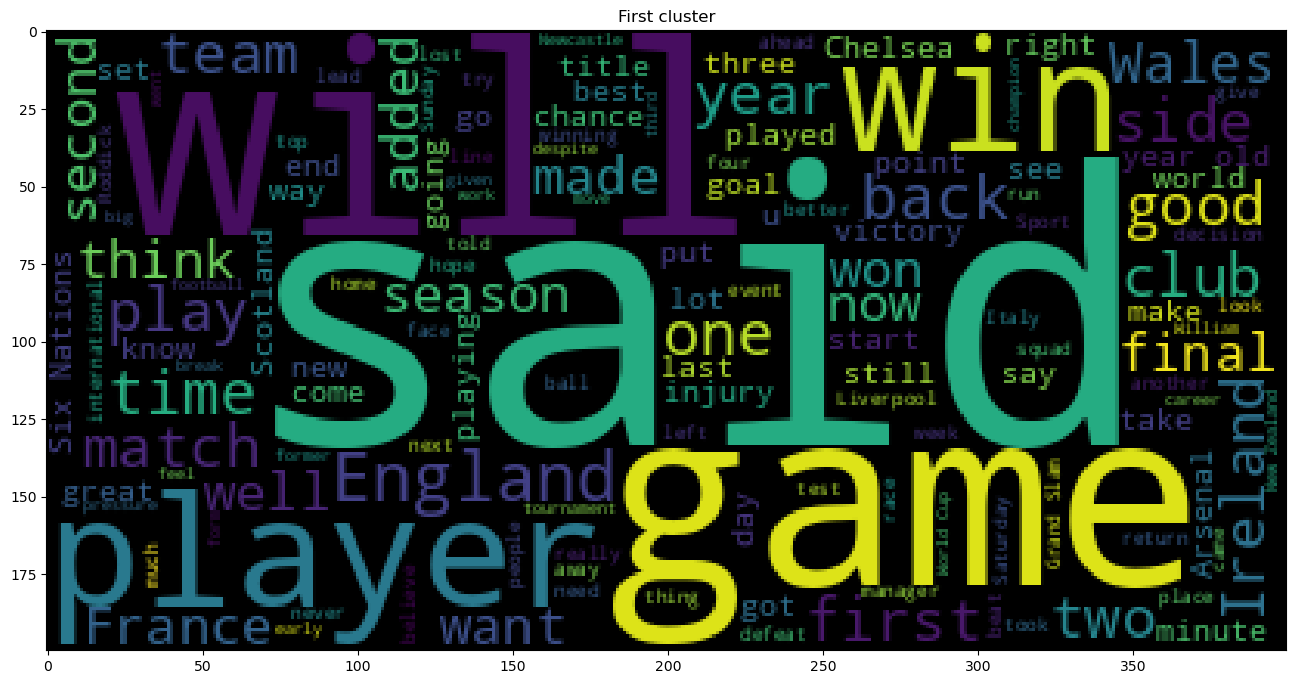

In [108]:
wc = WordCloud().generate(' '.join(two['headlines']))
plt.figure(figsize=(16,9))
plt.title('First cluster')
plt.imshow(wc)

In [112]:
freq = FreqDist(word_tokenize(' '.join(two['headlines'])))
new = ' '.join(two['headlines'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 963),
 ('game', 520),
 ('England', 465),
 ('first', 440),
 ('would', 422),
 ('win', 412),
 ('last', 370),
 ('one', 344),
 ('also', 343),
 ('two', 342)]

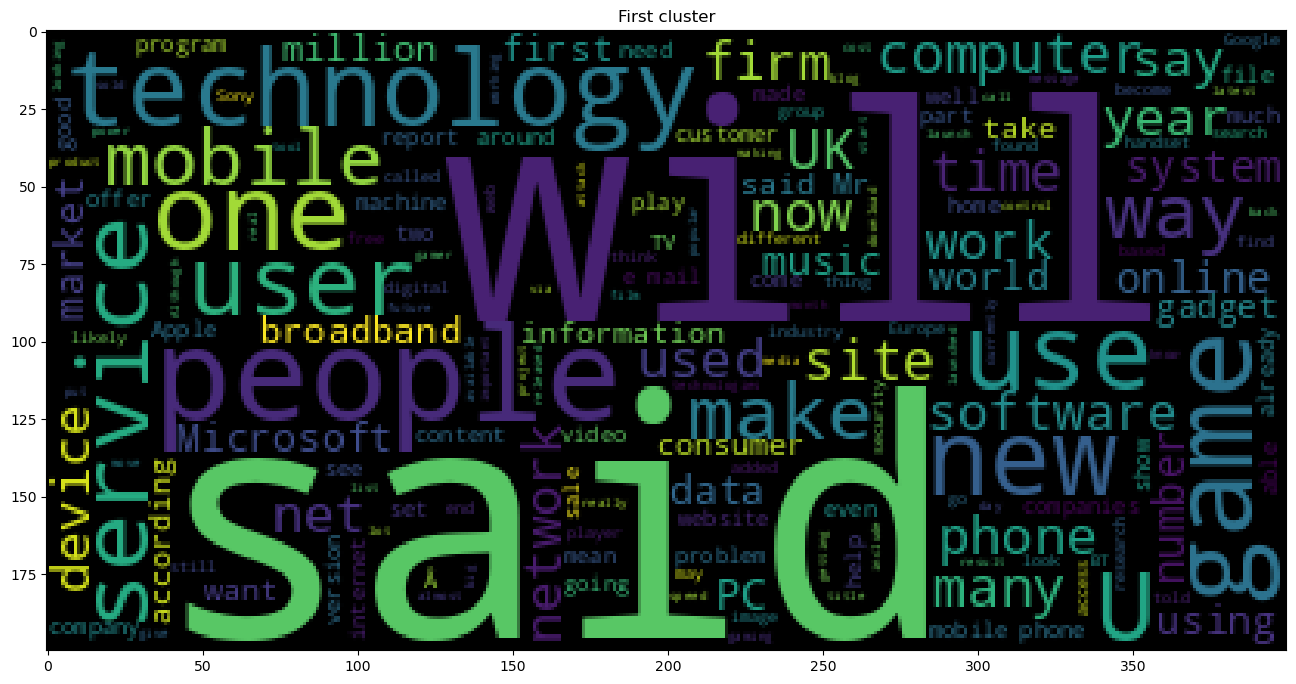

In [113]:
wc = WordCloud().generate(' '.join(zero['headlines']))
plt.figure(figsize=(16,9))
plt.title('First cluster')
plt.imshow(wc)

In [114]:
freq = FreqDist(word_tokenize(' '.join(zero['headlines'])))
new = ' '.join(zero['headlines'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1518),
 ('people', 885),
 ('also', 490),
 ('Mr', 475),
 ('technology', 468),
 ('new', 448),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 417)]

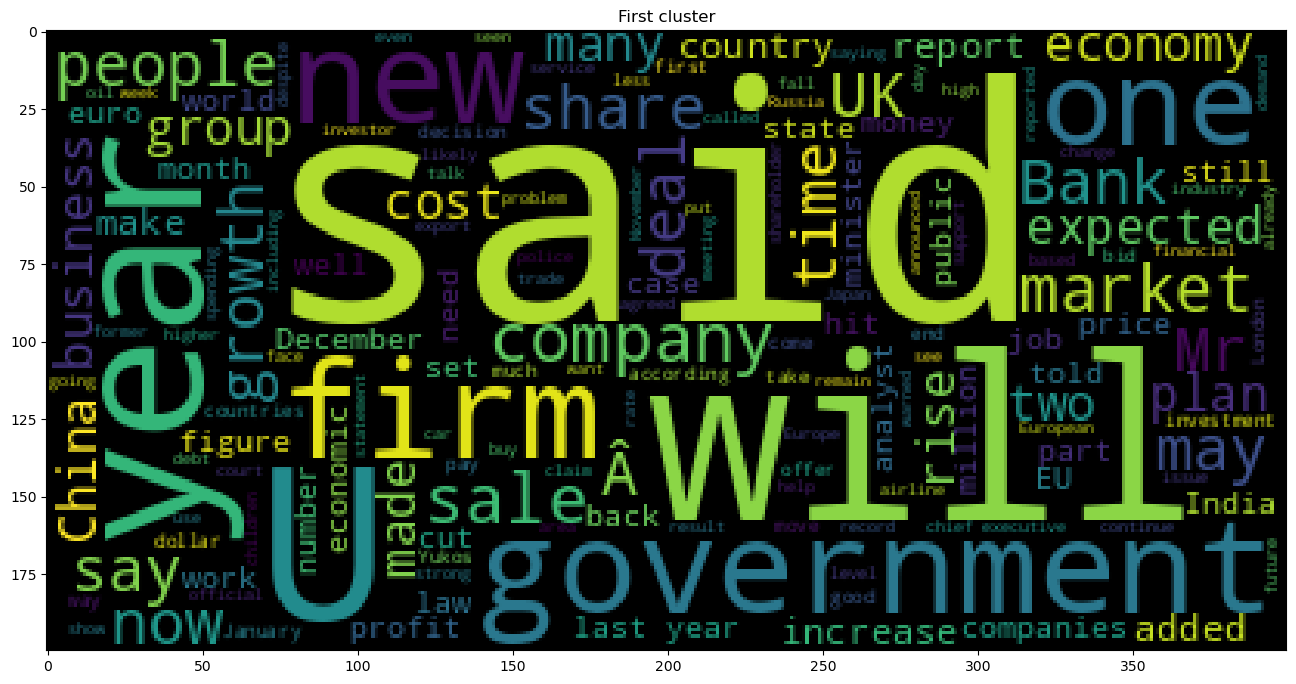

In [115]:
wc = WordCloud().generate(' '.join(three['headlines']))
plt.figure(figsize=(16,9))
plt.title('First cluster')
plt.imshow(wc)

In [116]:
freq = FreqDist(word_tokenize(' '.join(three['headlines'])))
new = ' '.join(three['headlines'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 2614),
 ('US', 932),
 ('Mr', 867),
 ('would', 775),
 ('year', 761),
 ('also', 603),
 ('government', 530),
 ('could', 463),
 ('company', 457),
 ('new', 451)]

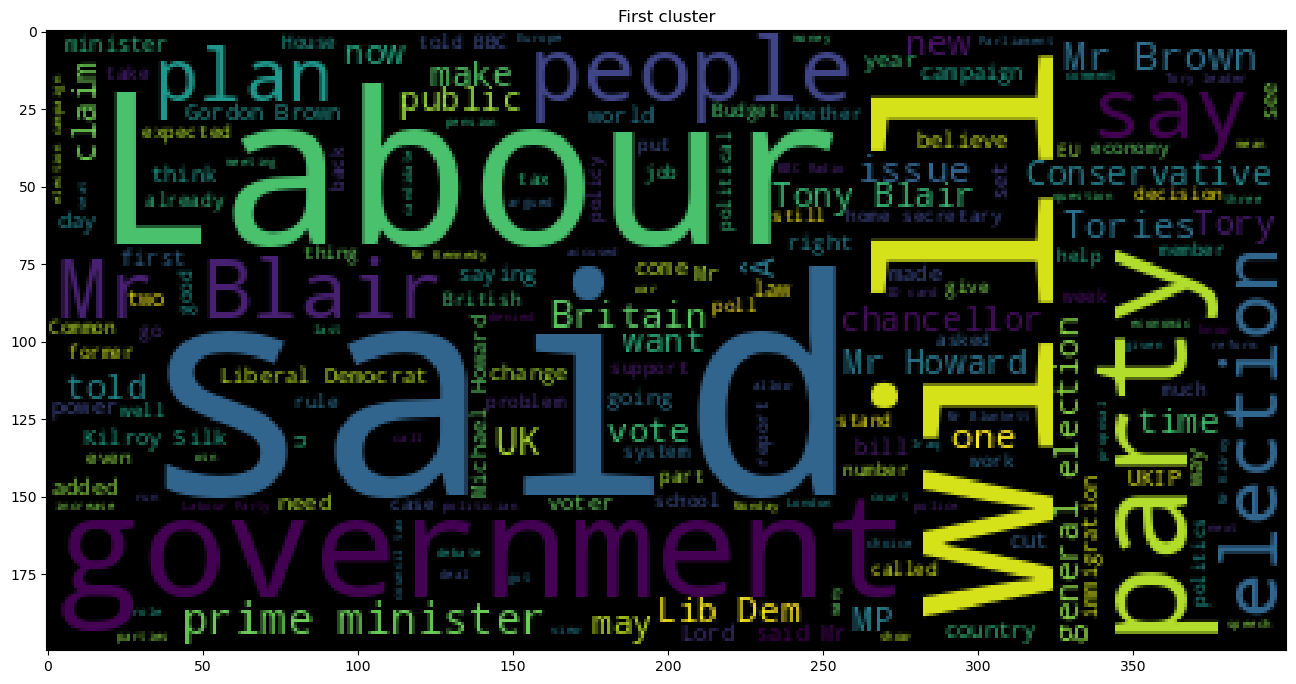

In [117]:
wc = WordCloud().generate(' '.join(four['headlines']))
plt.figure(figsize=(16,9))
plt.title('First cluster')
plt.imshow(wc)

In [118]:
freq = FreqDist(word_tokenize(' '.join(four['headlines'])))
new = ' '.join(four['headlines'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1528),
 ('Mr', 1485),
 ('would', 814),
 ('Labour', 727),
 ('election', 547),
 ('Blair', 540),
 ('government', 501),
 ('people', 431),
 ('party', 411),
 ('Brown', 375)]